In [1]:
# Import libraries
import numpy as np
import os
import matplotlib.pyplot as plt

from scipy.fftpack import dct
import numpy as np


In [101]:
# Define data pre-processing functions 

# Import the mnist dataset 
def import_mnist_data(num_img):
    # Unzip the mnist data
    if not os.path.exists("mnist_dataset/"):
        !unzip mnist_dataset.zip
    # Load the mnist data
    # Ignore the first column of the data (the label)
    data = np.loadtxt("mnist_dataset/mnist_test.csv", delimiter=",", max_rows=num_img, usecols=range(1,785))
    data = data.reshape(num_img, 784)
    return data

# Sparsify the data by setting all values below a threshold to 0
def sparsify_data(data, threshold):
    sparse_data = np.copy(data)
    for i in range(sparse_data.shape[0]):
        for j in range(sparse_data.shape[1]):
            if sparse_data[i,j] < threshold: 
                sparse_data[i,j] = 0

    return sparse_data

# Generates a random measurement matrix with normalized columns
def make_meas_matrix(rows, cols):
    # Generate a matrix of numbers from the standard normal distribution
    meas_matrix = np.random.randn(rows, cols)
    # Normalize the columns of the matrix
    for i in range(cols):
        meas_matrix[:,i] = meas_matrix[:,i] / np.linalg.norm(meas_matrix[:,i])

    return meas_matrix

#we can  use this too and see
def make_dct_meas_matrix(rows, cols):
    D = dct(np.eye(cols), norm='ortho')  
    return D[:rows, :]  

# Generate measurements from the data using the measurement matrix
def get_measurements(data, meas_matrix):
    return np.sign(meas_matrix @ data.T)

# Plot the original image and the sparsified image
def plot_images(original_data, sparsified_data):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(original_data.reshape(28,28), cmap='gray_r', vmin=0, vmax=255)
    axs[0].set_title("Original Image")
    axs[1].imshow(sparsified_data.reshape(28,28), cmap='gray_r', vmin=0, vmax=255)
    axs[1].set_title("Sparsified Image")
    plt.show()

# Plot the original image and the estimated image
def plot_est_images(original_data, est_data):
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(original_data.reshape(28,28), cmap='gray_r', vmin=0, vmax=255)
    axs[0].set_title("Original Image")
    axs[1].imshow(est_data.reshape(28,28), cmap='gray_r', vmin=0, vmax=255)
    axs[1].set_title("Reconstructed Image")
    plt.show()

def plot_meas_matrix(meas_matrix):
    plt.imshow(meas_matrix, cmap='rainbow', vmin=-1, vmax=1)
    plt.title("Measurement Matrix")
    plt.show()

(1, 784)
(1, 784)


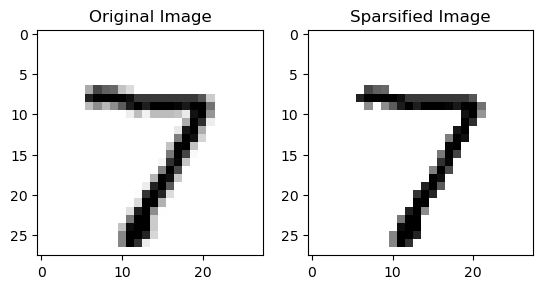

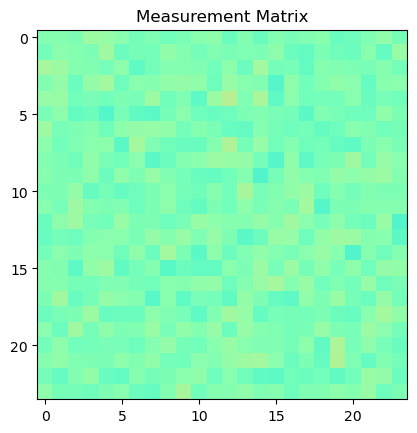

[[-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]

In [109]:
# Testing out data pre-processing functions

data = import_mnist_data(1)
print(data.shape)

sparse_data = sparsify_data(data, 100) #anything below 100 is = zero
print(sparse_data.shape)

plot_images(data, sparse_data)

meas_matrix = make_meas_matrix(200,784)
plot_meas_matrix(meas_matrix[0:24,0:24])

measurement = get_measurements(sparse_data, meas_matrix)
print(measurement)

In [ ]:
# Orthoginal Matching Pursuit Algorithm
def omp(meas_matrix, measurement, err_threshold, max_iter):
    estimate = np.zeros((meas_matrix.shape[1], 1))
    support = np.empty(0, dtype=int)
    residual = measurement

    iter = 0
    while np.linalg.norm(residual) > err_threshold and iter < max_iter:
        # Matching step
        h = meas_matrix.T @ residual
        # Support identification step
        k = np.argmax(abs(h))
        # Augment the support vector
        support = np.append(support, k)
        support = np.sort(support)
        # Update estimate
        meas_matrix_s = meas_matrix[:,support]
        estimate[support,:] = np.linalg.inv(meas_matrix_s.T @ meas_matrix_s) @ (meas_matrix_s.T @ measurement)
        # Update residual
        residual = measurement - meas_matrix @ estimate
        iter += 1

    return estimate

def get_k_support(v, k):
    w = np.copy(v)
    support = np.empty(0, dtype=int)
    for i in range(0, k):
        max_index = np.argmax(abs(w))
        support = np.append(support, max_index)
        w[max_index] = 0
    return support

# https://link.springer.com/article/10.1007/s11704-017-6132-7?utm_source=chatgpt.com
def msp(meas_matrix, measurement, err_threshold, max_iter):
    
    support = np.empty(0, dtype=int)
    estimate = np.random.randn(meas_matrix.shape[1], 1)
    estimate = estimate / np.linalg.norm(estimate)
    residual = measurement

    iter = 0
    while np.linalg.norm(residual) > err_threshold and iter < max_iter:
        # Compute measurement estimate
        h = np.diag(measurement) @ meas_matrix @ estimate
        # Compute sign violations
        r = np.maximum(h, 0)
        # Compute correction signal proxy
        s = meas_matrix.T @ (np.diag(measurement) @ r)
        # Identify correction support 
        # Get the indices of the 2K largest components of s
        support_s = get_k_support(s, 2 * k)
        support_est = get_k_support(estimate, estimate.shape[0])
        support = np.union1d(support_s, support_est)
        iter += 1

# Sign-truncated matching pursuit: https://arxiv.org/pdf/1312.3418
def one_bit_omp(meas_matrix, measurement, err_threshold, max_iter):
    estimate = np.zeros((meas_matrix.shape[1], 1))
    support = np.empty(0, dtype=int)
    residual = measurement

    c0 = 10
    # Compute first index
    h0 = np.argmax(abs(meas_matrix.T @ residual))
    meas_matrix_h0 = meas_matrix[:,h0]
    meas_matrix_h0c = np.delete(meas_matrix, h0, axis=1)
    C = np.diag(measurement) @ (np.eye(meas_matrix.shape[0]) - np.outer(meas_matrix[:,h0], meas_matrix[:,h0])/np.inner(meas_matrix[:,h0], meas_matrix[:,h0])) @ meas_matrix_h0c
    d = (c0 / np.inner(meas_matrix[:,h0], meas_matrix[:,h0])) @ np.diag(measurement) @ meas_matrix_h0
    iter = 0
    while np.linalg.norm(min((C @ estimate - d), 0))^2 >= 0.1 and iter < max_iter:
        # Matching step
        h = C.T @ min((C @ estimate - d), 0)
        # Support identification step
        k = np.argmax(abs(h))
        # Augment the support vector
        support = np.append(support, k)
        support = np.sort(support)
        # Update estimate
        all_indices = np.arange(meas_matrix.shape[1])  # All column indices
        complement_support = np.setdiff1d(all_indices, support)  # Get complement of support
        estimate[complement_support, :] = 0  # Zero out complement of support
        C_mat = min((C @ estimate - d), 0)
        estimate = np.linalg.inv(C_mat.T @ C_mat) @ (C_mat.T @ measurement)
        # Update residual
        residual = measurement - meas_matrix @ estimate
        iter += 1

    return estimate

def hard_thresholding(x, threshold):
    indices = np.where(abs(x) < threshold)
    x[indices] = 0
    return x

# https://link.springer.com/article/10.1007/s11704-017-6132-7?utm_source=chatgpt.com
# https://arxiv.org/pdf/2207.03427
def binary_iht(meas_matrix, measurement, lamda, eta, sparsity, max_iter):

    estimate = np.zeros((meas_matrix.shape[1], 1))
    convergence = []

    iter = 0
    while iter < max_iter:
        partial_f = (lamda/2) * meas_matrix.T @ (np.sign(measurement) - np.sign(meas_matrix @ estimate))
        last_estimate = estimate
        estimate = estimate + eta * partial_f
        
        # Hard thresholding
        support = get_k_support(estimate, 80)
        temp = np.zeros((meas_matrix.shape[1], 1))
        temp[support,:] = estimate[support,:]
        estimate = temp
        #estimate /= np.linalg.norm(estimate)

        convergence.append(np.linalg.norm(estimate - last_estimate))

        iter += 1

    return estimate, convergence
    


[0.00011792467124023473, 6.114489211939814e-05, 5.323862137370529e-05, 5.293532181587258e-05, 4.9254889358965893e-05, 4.921183767763777e-05, 4.7045165736609306e-05, 5.7565118317980856e-05, 5.2492674129288536e-05, 4.7840908102632604e-05, 4.981185087159142e-05, 4.7235491955231175e-05, 4.226307510221978e-05, 3.1572292128349955e-05, 3.164108428214647e-05, 3.072101496864288e-05, 3.182217588246429e-05, 3.051476660558846e-05, 2.837501674879156e-05, 2.5502352570181323e-05, 1.959929129007178e-05, 2.0946890344324155e-05, 1.9165551479910996e-05, 1.0085432346535135e-05, 9.127788024778263e-06, 1.0061653791870117e-05, 1.0769507509306405e-05, 6.086490348271023e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

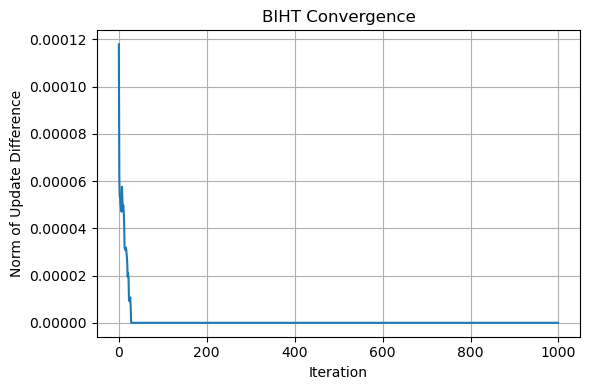

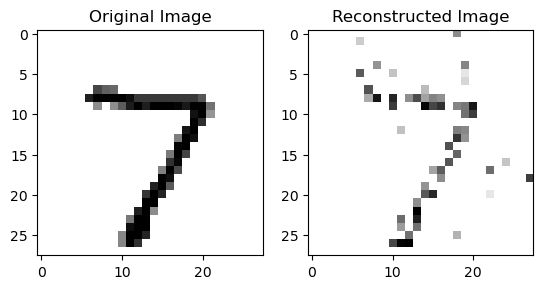

In [262]:
# Test out OMP algorithm 
data = import_mnist_data(1)
sparse_data = sparsify_data(data, 100)
meas_matrix = make_meas_matrix(500,784)
measurement = get_measurements(sparse_data, meas_matrix)

estimate, convergence = binary_iht(meas_matrix, measurement, 0.1, 0.0001, 100, 1000)
# Renormalize
estimate = estimate * 255/(max(estimate))

print(convergence)

plt.figure(figsize=(6, 4))
plt.plot(convergence)
plt.xlabel("Iteration")
plt.ylabel("Norm of Update Difference")
plt.title("BIHT Convergence")
plt.grid(True)
plt.tight_layout()
plt.show()

#estimate = sparsify_data(abs(estimate), 0)
plot_est_images(sparse_data, estimate)

Iterative Shrinkage threshoding algorithm

In [132]:
def soft_thresholding(x, threshold):
    return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

def ista(meas_matrix, measurement, eta, threshold, max_iter):
    estimate = np.zeros((meas_matrix.shape[1], 1))
    convergence = []
    for t in range(max_iter):
        update = estimate - 2 * eta * meas_matrix.T @ (meas_matrix @ estimate - measurement)
        estimate = soft_thresholding(update, threshold)
        diff = np.linalg.norm(update - estimate)
        convergence.append(diff)
        #print(f"Iter {t}: Update norm = {diff:.6f}")

    return estimate, convergence



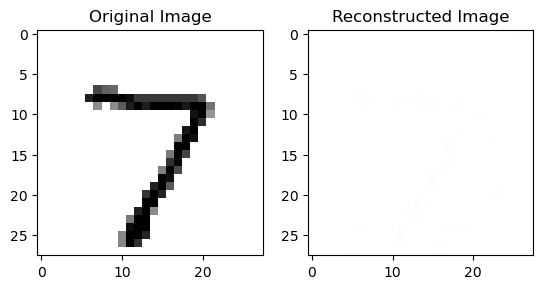

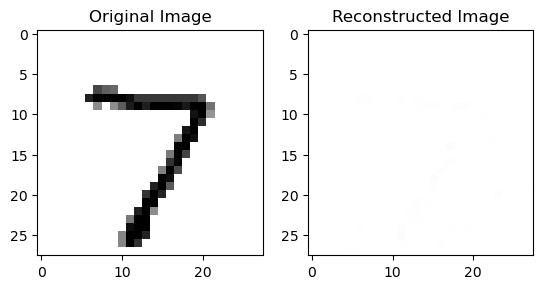

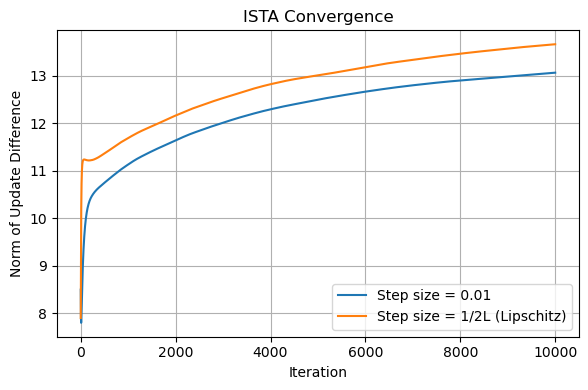

In [111]:
meas_matrix = make_meas_matrix(300,784)
measurement = get_measurements(sparse_data, meas_matrix)

eta = 0.01
estimate, convergence = ista(meas_matrix, measurement, eta, 0.001, 10000)
#estimate = sparsify_data(abs(estimate), 100)
plot_est_images(sparse_data, estimate)

L = np.linalg.norm(meas_matrix.T @ meas_matrix, 2)  # Lipschitz constant
eta = 1 / (2 * L)  
estimate, convergence_lipschitz = ista(meas_matrix, measurement, eta, 0.001, 10000)
#estimate = sparsify_data(abs(estimate), 100)
plot_est_images(sparse_data, estimate)

# Plot convergence 
plt.figure(figsize=(6, 4))
plt.plot(convergence)
plt.plot(convergence_lipschitz)
plt.xlabel("Iteration")
plt.ylabel("Norm of Update Difference")
plt.title("ISTA Convergence")
plt.legend(["Step size = 0.01", "Step size = 1/2L (Lipschitz)"])
plt.grid(True)
plt.tight_layout()
plt.show()